<a href="https://colab.research.google.com/github/maheshmahajan133/mahesh-mahajan-Branch1/blob/29maybranch/with_graphs_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

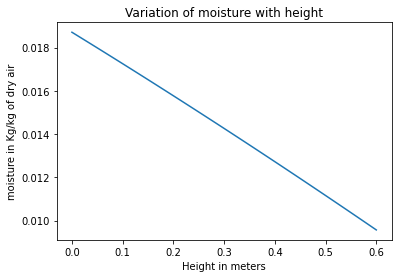

In [23]:
import math
import cmath
import numpy as np
import matplotlib.pyplot as plt

H=float(input("Enter the height of the column in meter:")) # meter
m=float(input("Enter the number of the steps in the column for stepwise calculation(more the steps more the accuracy):"))

dz=H/m
at=float(input("Enter the packing density of the dehumidifier in m2/m3:"))               #packing density  m2/m3
R=8314    #R=82.057*pow(10,-3)                                                 #universal gas constant m3.atm/Kg.mol.K
g=9.81                 #m/s2

volume_of_tank=0.6*0.6*0.75    #volume of the tank of dehumidifier in m
thickness_sheet=float(input("Enter the thickness_sheet in meter:"))         #thickness_sheet in meter
void_fraction=(volume_of_tank-at*0.5*volume_of_tank*thickness_sheet)/(volume_of_tank)                #for 256 it comes out to be 0.872
print("void_fraction:",void_fraction)
Dp=6*(1-void_fraction)/at                                                             # Equivalent diameter of flow channel in meter
print(" effetive diameter of the channel that, Dp in (meter)=",Dp)

L=desiccant_flow=float(input("Enter the Desiccant flow rate in Kg/m2.s :"))    #Desiccant flow rate in Kg/m2.s
ratio=float(input("Enter the L/G ratio :"))                                 #Liquid to air flow rate
G=L/ratio
t_air=temp=float(input("Enter the temperature in degree celcius for air:"))
t_des=temp_desiccant=float(input("Enter the desiccant inlet temperature in degree celcius:"))
x=conc3=float(input("Enter the Concentration of the solution:"))
dY_N=float(input("Enter the inlet specific moisture in Kg/Kg of dry air :")) #Kg/Kg of dry air

dY_N1_list = []
dz_list= np.linspace(0, H, 100)
n=0
while m>n :
  T=273.15+t_air
  den_g=10**(-5)*t_air**2-0.0044*t_air+1.2877                     #Kg/m3
  visco_g=(-9*pow(10,-8)*t_air**2+0.0002*t_air+0.0623)/3600                  #Pa.s
  Dg=diffu_g=(5*pow(10,-7)*t_air**2+0.0005*t_air+0.0684)/3600              #m2/s
  Kg=5.23*(at*Dg/(t_air*R))*(G/(at*visco_g))**0.7*(visco_g/(den_g*Dg))**(1/3)*(at*Dp)**(-2.0)
  Ka=-3*10**(-8)*t_air**2+8*10**(-5)*t_air+0.0244    #In W/m.k with celci of air
  P=1.010325                                                               # Total Presssure in atmospheric pressure in pascles
  Fg=Kg*P                                                                #to convert the K type coefficient in F type coefficient

  #To calculate the density of LiCl solution
  
  c1=1.9937718430
  c2=1.0985211604
  c3=-0.5094492996
  c4=-1.7619124270
  c5=-44.9005480267
  c6=-723692.2618632
  thetha3=(t_des+273.15)/647.3
  tau=1-thetha3
  y=(x/(1-x))
  critical_density_of_water=322   # kg/m3
  density_of_water=round(critical_density_of_water*(1+c1*tau**(1/3)+c2*tau**(2/3)+c3*tau**(5/3)+c4*tau**(16/3)+c5*tau**(43/3)+c6*tau**(110/3)),4)
  f1=1.0
  f2=0.540966
  f3=-0.303792
  f4=0.100791
  density_of_solution=round(density_of_water*(f1+f2*y**2+f3*y**3+f4*y**4),4)
  rho_l=density_of_solution

  #To calculate the thermal conductivity of LiCl solution
  alpha1=-11.7882*10**-3
  alpha0= 10.8958*10**-3
  alphaR=alpha0+x*alpha1
  thermal_conducti_water20=0.6075 # W/m.K
  thermal_conducti_water= thermal_conducti_water20*(0.208495+1.747278*thetha3)
  Is=1                         #mostly equal to 1 for diluted solutions
  M=18   #Molar mass of water
  equi_condu_depression= x*rho_l*Is/M
  ther_condu_solu =thermal_conducti_water-equi_condu_depression*alphaR

  #To calculate the specefic heat capacity of the solution
  e1=1.43980
  e2=-1.24317
  e3=-0.12070
  e4=0.12825
  e5=0.62934
  e6=58.5225
  e7=-105.6343
  e8=47.7948
  peta=((t_des+273.15)/228)-1
  cp_water_temp=(2*10**-9*t_des**4-4*10**-7*t_des**3+5*10**-5*t_des**2-0.0021*t_des+4.2104)  #in  KJ/Kg.K
  if x<=0.31 :
    e9=e1*x+e2*x**2+e3*x**3
  else :
    e9=e4+e5*x
  e10=e6*peta**0.02+e7*peta**0.04+e8*peta**0.06
  cp_sol_peta=cp_water_temp*(1-e9*e10)

  #To calculate the viscosity of the solution
  #dynamic density of licl
  c1=1.0261862
  c2=12481.702
  c3=-19510.923
  c4=7065.286
  c5=-395.561
  c6=143922.996
  visco_water_0celci=0.001793 # Pa.second
  thetha_visco=(t_des/228)-1
  visco_water_temp=(2*10**-11*t_des**4-6*10**-9*t_des**3+7*10**-7*t_des**2-5*10**-5*t_des+0.0017)      # Pa.s
  d1=0.090481
  d2=1.390262
  d3=0.675875
  d4=-0.583517
  falta=(x/(1-x)**(1/0.6))
  visco_solu= visco_water_temp * (math.exp((d1*falta**3.6+d2*falta+d3*(falta/thetha_visco)+d4*falta**2)))      #Pa.s

  #To calculate the surface tension of solution
  surface_tension_0water=0.2358  # N/m
  zeta= -0.625
  mu= 1.256
  theta2=((t_des+273.15)/647.3)
  surface_tension_water=surface_tension_0water*(1-zeta*(1-theta2))*((1-theta2)**mu)
  b1=2.757115
  b2=-12.011299
  b3=14.751818
  b4=2.443204
  b5=-3.147739
  surface_tension_solution= surface_tension_water * (1+(b1*x)+(b2*theta2*x)+(b3*x*theta2**2)+(b4*x**2)+(b5*x**3))  #N/m

  #To calculate the liquid diffusisvity=D_l
  D_l=ther_condu_solu/(rho_l*cp_sol_peta)                                          #Themal diffusivity od liquid in m2/s

  #To calculate the desiccant mass transfer coefficient
  Kl=(visco_solu*g/rho_l)**(1/3)*0.0051*(L/(at*visco_solu))**(2/3)*(visco_solu/(rho_l*D_l))**(-1/2)*(at*Dp)**0.4

  # to convert k type coefficent to f type coefficient
  xsm=1  #for dilute solution
  Fl=Kl*xsm*rho_l/M
  # To calculate the vapor pressure of the solution

  T=273.15+t_des
  z=T/647.096
  Z1=np.exp((1/z)*(-7.85951783*(1-z)+1.84408259*(1-z)**1.5-11.7866497*(1-z)**3+22.6807411*(1-z)**3.5-15.9618719*(1-z)**4+1.86122502*(1-z)**7.5))
  ps_water_temp=22064*Z1*1000  #in pa water saturation pressure
  z0=0.28
  z1=4.30
  z2=0.60
  z3=0.21
  z4=5.10
  z5=0.49
  z6=0.362
  z7=-4.75
  z8=-0.40
  z9=0.03
  M=2-(1+(x/z0)**z1)**z2
  N=(1+(x/z3)**z4)**z5-1
  z10=M+N*z
  z11=1-(1+(x/z6)**z7)**z8-z9*np.exp((x-0.1)**2/(-0.005))
  pressure_solution_conc_temp=z10*z11*ps_water_temp      #pa
 

  #to calculate the change in humidity of the system  
  MW=18
  P=101325 # pa
  moist1=dY_N1=dz*(dY_N/dz-(MW*Fg*at/G)*math.log((1-(pressure_solution_conc_temp/P))/(1-(ps_water_temp/P))))
  slope=-(MW*Fg*at/G)*math.log((1-(pressure_solution_conc_temp/P))/(1-(ps_water_temp/P)))
  dL_N=L
  slope=-slope
  dL_N1=dz*(dL_N/dz+G*slope)

  dX_N=x
  dX_N1=dz*(dX_N/dz-G*x*slope/L)

  #TO CALCULATE THE SPECIFIC HEAT OF THE WATER VAPOR
  Cpv=(0.016*t_air**2+0.1541*t_air+1858.7)/1000      #in kj/Kg.K and temp in celci

  #TO CALCULATE THE SPECIFIC HEAT OF THE AIR
  Cpa=(-5*10**(-7)*t_air**4+7*10**(-5)*t_air**3-0.0019*t_air**2+0.0044*t_air+1006.2)/1000    #Temp in celci and CPa in KJ/Kg.K

  #To CALCULATE THE THERMAL CONDUCTIVITY OF AIR WITH TEMP
  Ka=-3*10**(-8)*t_air**2+8*10**(-5)*t_air+0.0244    #In W/m.k with celci of air

  #To calculate the smidth Number
  Sc=visco_g/(den_g*Dg)

  #To Calculate the prandtl number
  Pr=(Cpa*visco_g*1000/(Ka))

  MA=28.97   #The molecular weight of dry air is 28.97 grams per mole

  #TO CALCULATE THE HEAT TRANSFER COEFFIECNT FOR AIR SIDE hg
  h_g=Fg*MA*(Cpa+dY_N*Cpv)*(Sc**(2/3))/(Pr**(2/3))

  h_g_desh_into_at=-G*Cpv*slope/(1-math.exp(G*Cpv*slope/(h_g*at)))

  #To calculate the outlet temp of air dTa_N1
  dTa_N=t_air
  dTa_N1=dz*(dTa_N/dz+(h_g_desh_into_at*(t_des-t_air))/(G*(Cpa+dY_N*Cpv)))

  #TO CALCULATE THE DESICCANT OUTLET TEMP
  slope2=(h_g_desh_into_at*(t_des-t_air))/(G*(Cpa+dY_N*Cpv))
  dTL_N=t_des
  T_R=0   #reference temeprature here 0 degree celci
  lambda_R=2230 # latent heat of condensation in 2230j/gm at T_R which is at 0 degree celci
  dTL_N1=dz*((dTL_N/dz)+(G/(cp_sol_peta*L))*((Cpa+dY_N*Cpv)*slope2+(Cpv*(t_air-T_R)-cp_sol_peta*(t_des-T_R)+lambda_R)*slope))


  dY_N1_list.append(dY_N1)
  L=dL_N1
  G=L/ratio
  t_air=dTa_N1
  t_des=dTL_N1
  x=dX_N1
  dY_N=dY_N1
  n=n+1
  print(n)
print("%%The moisture output at the end of the step size {} is {} Kg/Kg of dry air".format(dz,dY_N1))
print("%%The outlet mass flow rate of desiccant at outlet is {} kg/m2.s" .format(dL_N1))
print("%%THE OUTLET CONCENTRAION (weight fraction) OF THE DESICCANT SOULTION IS {}".format(dX_N1))
print("%%THE OUTLET TEMPERATURE OF AIR AT THE EXIT IS {} celcius".format(dTa_N1))
print("%%THE OUTLET TEMPERATURE OF desiccant AT THE EXIT IS {} celcius".format(dTL_N1))


# plotting the points
plt.plot(dz_list, dY_N1_list)
# naming the x axis
plt.xlabel('Height in meters')
# naming the y axis
plt.ylabel('moisture in Kg/kg of dry air')
 
# giving a title to my graph
plt.title('Variation of moisture with height')
 
# function to show the plot
plt.show()


